# Customer Analysis Case Study

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import boxcox
pd.options.display.max_rows = 100
## Install xlrd package to load Excel files
#!conda install openpyxl
#!conda install xlrd

## Activity 3 - Monday 2023-01-18

### 1. Loading Data

In [2]:
# Load datasets individually
ma_df = pd.read_csv('Data/Data_Marketing_Customer_Analysis_Round3.csv')
ma_df

,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,central,4809,no,basic,college,2/18/11,feb,employed,m,48029,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,92260,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,22139,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,49078,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,23675,...,31,0,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,15563,no,premium,bachelor,1/19/11,jan,unemployed,f,61541,...,40,0,7,personal auto,personal l1,offer3,web,1214,luxury car,medsize
10685,north west,5259,no,basic,college,1/6/11,jan,employed,f,61146,...,68,0,6,personal auto,personal l3,offer2,branch,273,four-door car,medsize
10686,central,23893,no,extended,bachelor,2/6/11,feb,employed,f,39837,...,63,0,2,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize
10687,west region,11971,no,premium,college,2/13/11,feb,employed,f,64195,...,27,4,6,personal auto,personal l1,offer1,branch,618,suv,medsize


In [3]:
ma_df.drop(columns=['effective_to_date'], inplace=True)

In [4]:
ma_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689 entries, 0 to 10688
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   region                         10689 non-null  object
 1   customer_lifetime_value        10689 non-null  int64 
 2   response                       10689 non-null  object
 3   coverage                       10689 non-null  object
 4   education                      10689 non-null  object
 5   month                          10689 non-null  object
 6   employment_status              10689 non-null  object
 7   gender                         10689 non-null  object
 8   income                         10689 non-null  int64 
 9   location_code                  10689 non-null  object
 10  marital_status                 10689 non-null  object
 11  monthly_premium_auto           10689 non-null  int64 
 12  months_since_last_claim        10689 non-null  int64 
 13  m

### 2. Separating Data

#### 2.1.Getting Numeric Data

In [5]:
# Define a function for identifying numerical columns
def get_num_cols(df):
    num_cols = df.select_dtypes(include = np.number).columns
    return num_cols

In [6]:
numerical = ma_df[get_num_cols(ma_df)]
numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689 entries, 0 to 10688
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   customer_lifetime_value        10689 non-null  int64
 1   income                         10689 non-null  int64
 2   monthly_premium_auto           10689 non-null  int64
 3   months_since_last_claim        10689 non-null  int64
 4   months_since_policy_inception  10689 non-null  int64
 5   number_of_open_complaints      10689 non-null  int64
 6   number_of_policies             10689 non-null  int64
 7   total_claim_amount             10689 non-null  int64
dtypes: int64(8)
memory usage: 668.2 KB


In [7]:
numerical.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')

#### 2.1.Getting Categorical Data

In [8]:
# Define a function for identifying categorical columns
def get_cat_cols(df):
    cat_cols = df.select_dtypes(include = object).columns
    return cat_cols

In [9]:
categorical = ma_df[get_cat_cols(ma_df)]
categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689 entries, 0 to 10688
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   region             10689 non-null  object
 1   response           10689 non-null  object
 2   coverage           10689 non-null  object
 3   education          10689 non-null  object
 4   month              10689 non-null  object
 5   employment_status  10689 non-null  object
 6   gender             10689 non-null  object
 7   location_code      10689 non-null  object
 8   marital_status     10689 non-null  object
 9   policy_type        10689 non-null  object
 10  policy             10689 non-null  object
 11  renew_offer_type   10689 non-null  object
 12  sales_channel      10689 non-null  object
 13  vehicle_class      10689 non-null  object
 14  vehicle_size       10689 non-null  object
dtypes: object(15)
memory usage: 1.2+ MB


### 3. Checking Normality

#### 3.1. Constructing Histograms

In [10]:
numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689 entries, 0 to 10688
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   customer_lifetime_value        10689 non-null  int64
 1   income                         10689 non-null  int64
 2   monthly_premium_auto           10689 non-null  int64
 3   months_since_last_claim        10689 non-null  int64
 4   months_since_policy_inception  10689 non-null  int64
 5   number_of_open_complaints      10689 non-null  int64
 6   number_of_policies             10689 non-null  int64
 7   total_claim_amount             10689 non-null  int64
dtypes: int64(8)
memory usage: 668.2 KB


/Users/marcelzhang/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/marcelzhang/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/marcelzhang/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level functio

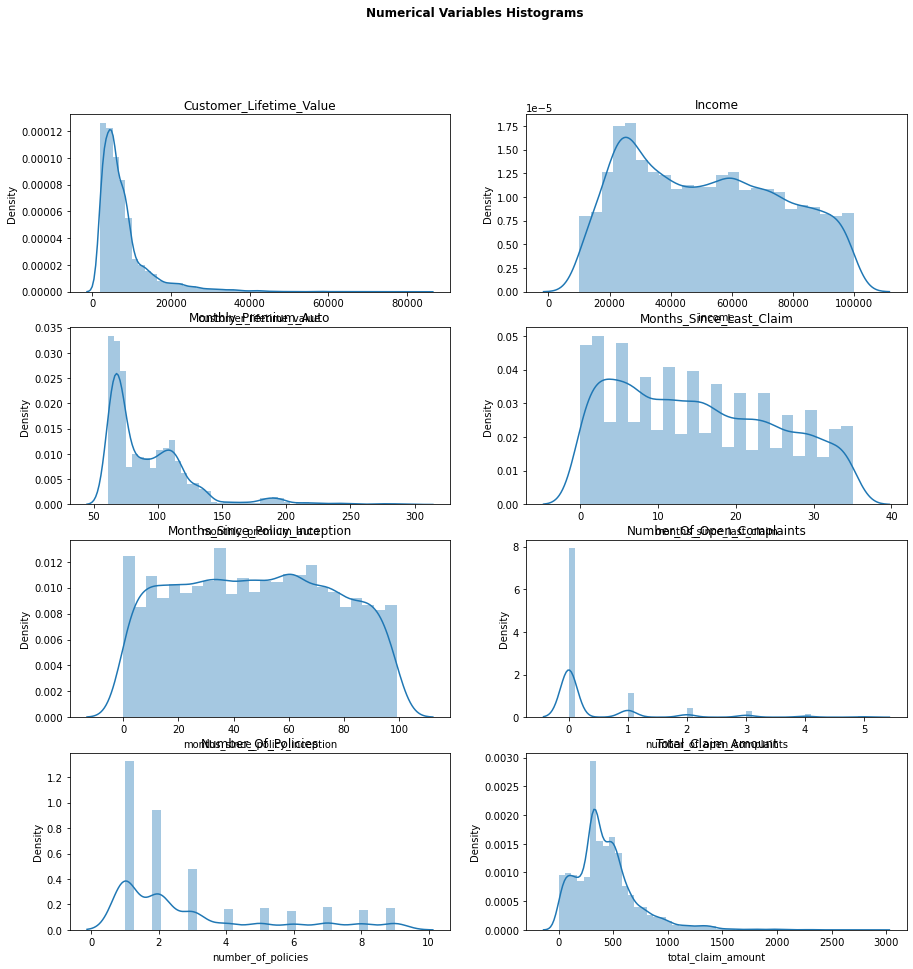

In [23]:
# Use seaborn library to construct distribution plots for the numerical variables.
# Define grid
fig1, ax1 = plt.subplots(4,2,figsize=(15,15))
plt.suptitle("Numerical Variables Histograms", fontweight = "bold")

# Flatten the axes array or iteration
ax1 = ax1.flatten()

# Iterate over the columns
for i, column in enumerate(numerical.columns):
    # Plot histograms for each columns in the corresponding slot
    #sns.histplot(data = numerical, x = column, ax = ax1[i])
    sns.distplot(numerical[column], ax = ax1[i])
    # Set title for each histogram
    ax1[i].set_title(column.title())



In [12]:
#Use Matplotlib to construct histograms
# Realize manually

# fig2, ax2 = plt.subplots(4,2,figsize=(16,24))
# plt.suptitle("Numerical Variables Histograms", fontweight = "bold")

# plt.sca(ax2[0,0])
# plt.hist(numerical["customer_lifetime_value"])
# ax2[0,0].set_title("Customer Lifetime Value")

# plt.sca(ax2[0,1])
# plt.hist(numerical["income"])
# ax2[0,1].set_title("Income")

# plt.sca(ax2[1,0])
# plt.hist(numerical["monthly_premium_auto"])
# ax2[0,1].set_title("Income")

# plt.sca(ax2[1,1])
# plt.hist(numerical["months_since_last_claim"])
# ax2[1,1].set_title("Months Since Last Claim")

# plt.sca(ax2[2,0])
# plt.hist(numerical["months_since_policy_inception"])
# ax2[2,0].set_title("Months Since Policy Inception")

# plt.sca(ax2[2,1])
# plt.hist(numerical["number_of_open_complaints"])
# ax2[2,1].set_title("Number of Open Complaints")

# plt.sca(ax2[3,0])
# plt.hist(numerical["number_of_policies"])
# ax2[3,0].set_title("Number of Policies")

# plt.sca(ax2[3,1])
# plt.hist(numerical["total_claim_amount"])
# ax2[3,1].set_title("Total Claim Amount")

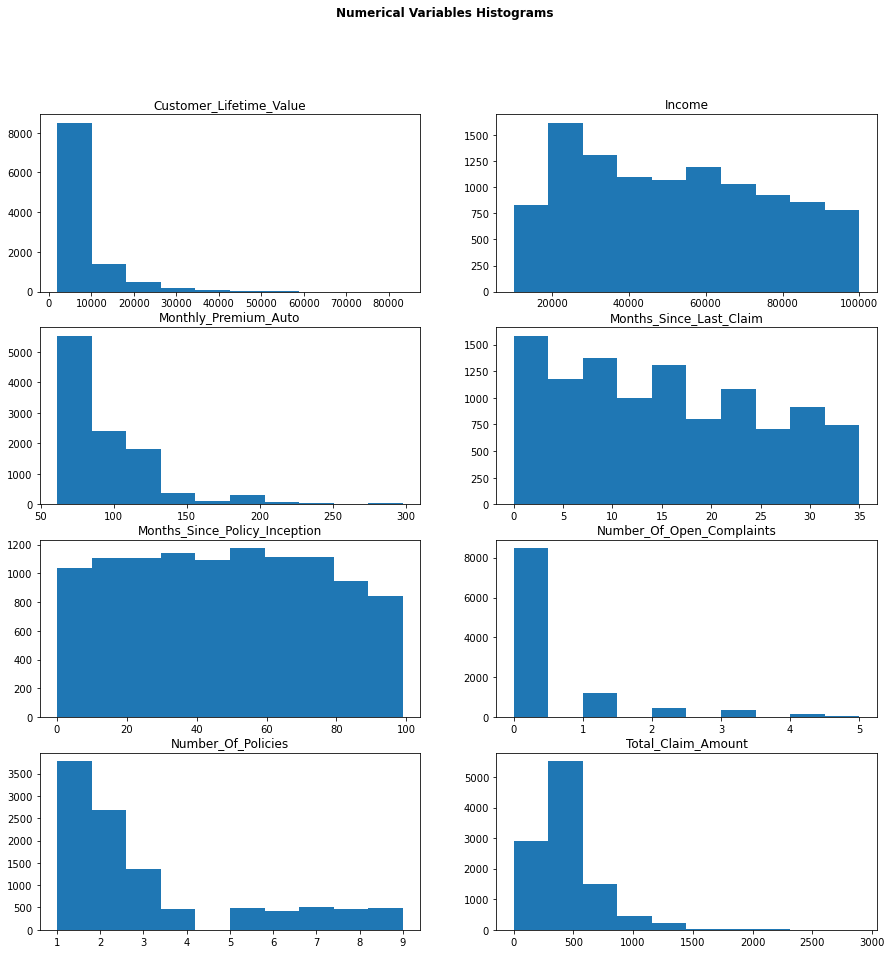

In [24]:
#Use for loop
fig2, ax2 = plt.subplots(4,2,figsize=(15,15))
plt.suptitle("Numerical Variables Histograms", fontweight = "bold")

for i, column in enumerate(numerical.columns):
    # Locate where to plot
    plt.sca(ax2[i//2,i%2])
    # Plot histograms
    plt.hist(numerical[column])
    # Add subtitles respectively
    ax2[i//2,i%2].set_title(column.title())

### 4. Checking for Correlation

In [14]:
# Get a the list of input features (excluding the target feature "total_claim_amount")
input_feat = numerical.columns.tolist()
input_feat.remove("total_claim_amount")

In [15]:
input_feat

['customer_lifetime_value',
 'income',
 'monthly_premium_auto',
 'months_since_last_claim',
 'months_since_policy_inception',
 'number_of_open_complaints',
 'number_of_policies']

In [16]:
# Print out a correlation matrix
corr_matrix_input_feat = numerical[input_feat].corr()
print(corr_matrix_input_feat)

                               customer_lifetime_value    income  \
customer_lifetime_value                       1.000000  0.003732   
income                                        0.003732  1.000000   
monthly_premium_auto                          0.404235 -0.002431   
months_since_last_claim                       0.011912 -0.026564   
months_since_policy_inception                 0.017055  0.003846   
number_of_open_complaints                    -0.032371  0.018903   
number_of_policies                            0.016789 -0.004461   

                               monthly_premium_auto  months_since_last_claim  \
customer_lifetime_value                    0.404235                 0.011912   
income                                    -0.002431                -0.026564   
monthly_premium_auto                       1.000000                 0.010036   
months_since_last_claim                    0.010036                 1.000000   
months_since_policy_inception              0.019696    

<AxesSubplot:>

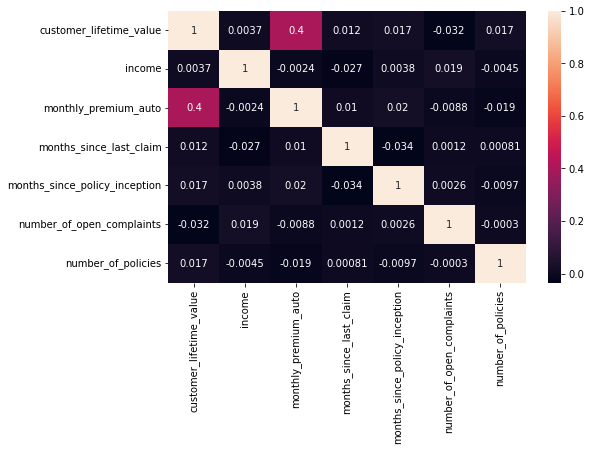

In [17]:
# Create a heatmap
fig3 = plt.figure(figsize=(8,5))
sns.heatmap(corr_matrix_input_feat,annot=True)

In [18]:
# There is no pair of features that have a correlation greater than 0.9, then no features need to be dropped.